# 1.1 Поліноми Лагерра 
Поліномами Лаґерра називаються розв'язки диференційного рівняння $$xy^{\prime\prime}+(1-x)*y^\prime+ny=0$$

Полiноми Лагера визначаються формулою: $$L_n(x)= \frac{e^x}{n!}\frac{d^n}{dx^n}(e^{-x}*x^n)$$

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.integrate import quad
import ipywidgets as widgets
from IPython.display import display, clear_output

# 1.2 Функцiї Лагерра
Функцiї Лаґерра задають формулою: $$l_n(t) := \sqrt{σ}L_n(σt)e^{\frac{-β}{2}t}$$
де
- Ln – полiноми Лаґерра,
- 0 ≤ β ≤ σ – параметри, дiйснi числа

Для обчислень функцiй Лаґерра використовують рекурентну формулу:

- $l_n(t)=\frac{2n-1-σt}{n}l_{n-1}(t)-\frac{n-1}{n}l_{n-2}(t),$ n≥2
- $l_0(t)= \sqrt{σ} e^{\frac{-β}{2}t}$
- $l_1(t)=\sqrt{σ}(1-σt)e^{\frac{-β}{2}t}$


In [34]:
# task1
def laguerre(t,n,beta=2,sigma=4):
    l0 = np.sqrt(sigma) * (np.exp(-beta * t / 2))
    l1 = np.sqrt(sigma) * (1 - sigma * t) * (np.exp(-beta * t / 2))
    if n==0:
        return l0
    elif n==1:
        return l1
    else:
        lnext = (2 * 2 - 1 - t * sigma) / 2 * l1 - (2 - 1) / 2 * l0
        for j in range(3, n+1):
            l0 = l1
            l1 = lnext
            lnext = (2 * j - 1 - t * sigma) / j * l1 - (j - 1) / j * l0 
        return lnext
        

In [35]:
result = laguerre(1,5,2,4)

print(result)

-0.6376576980305


In [36]:
# task 2
def tabulate_laguerre(n, beta, sigma, T, num_points=100):
    t_values = np.linspace(0, T, num_points)
    laguerre_values = [laguerre(t, n, beta, sigma) for t in t_values]
    return t_values, laguerre_values

In [37]:
n = 2
beta = 2
sigma = 4
T = 10
num_points = 100

t_values, laguerre_values = tabulate_laguerre(n, beta, sigma, T, num_points)

df = pd.DataFrame(laguerre_values,t_values)
df

,0
0.00000,2.000000
0.10101,0.494525
0.20202,-0.473357
0.30303,-1.018680
0.40404,-1.236873
...,...
9.59596,0.089885
9.69697,0.083067
9.79798,0.076747
9.89899,0.070891


In [38]:
#task 3
def experiment(n=20, beta=2, sigma=4, eps=0.001, t_max = 100, t_points=1000):
    T = np.linspace(0, t_max, t_points)
    N = range(0, n + 1)
    suitable_t = None
    for t in T:
        is_t_suitable = all(abs(laguerre(t=t, n=n, beta=beta, sigma=sigma)) < eps for n in N)
        if is_t_suitable and suitable_t is None:
            suitable_t = t
            break

    return suitable_t, N

In [39]:
t, N = experiment()

df = pd.DataFrame(laguerre(t=t, n=n, beta=beta, sigma=sigma) for n in N)
df

,0
0,9.066138e-35
1,-2.858701e-32
2,4.478343e-30
3,-4.647081e-28
4,3.593209e-26
5,-2.208132e-24
6,1.123332e-22
7,-4.865604e-21
8,1.831625e-19
9,-6.087176e-18


# 1.3 Перетворення Лаґерра (ПЛ)
Пiд ПЛ будемо розумiти вiдображення L :$ L^2_a(R_+)$ → *$l^2$*, яке довiльнiй функцiї f ∈ $L^2_a$ ставить у вiдповiднiсть послiдовнiсть f := (f0, f1, ..., fk, ...)⊤∈ $l^2$
за формулою $$f_k = \int_{R_+}^{} f(t)l_k(t) e^{-αt}\, dt$$  
$$a=σ-β$$



In [40]:
#task 4
def transform_laguerre(f,n,beta=2,sigma=4):
    def func(t):
        alpha = sigma-beta 
        print(f(t)*laguerre(t,n,beta,sigma) * np.exp(-alpha*t))
        return f(t)*laguerre(t,n,beta,sigma) * np.exp(-alpha*t)
    t = experiment(n, beta,sigma)[0]

    return quad(func,0,t)[0]

In [41]:
def tabulate_transformation(f, N, beta=2, sigma=4):
    result = []
    for n in range(N+1):
        result.append(transform_laguerre(f, n, beta, sigma))
    return result

## Нам дана функція:$$f(t)= sin(t-\frac{\pi}{2})+1, t∈[0,2\pi]$$ 
## $$f(t)=0$$ в інших випадках

In [42]:
#task 5
def f(t):
    if t >= 0 and t <= 2*np.pi:
        return np.sin(t-np.pi/2) + 1
    else:
        return 0

results = tabulate_transformation(f, 20,2,4)

df = pd.DataFrame(results)
df

3.959484238721473e-05
0.007308468850960116
0.0
0.05525940404914359
0.0
0.03380775225711959
0.0
0.00482844765371077
5.12996732042392e-08
0.00024152154456183553
5.4075651343506e-06
0.00025968727654179753
0.0
0.03162180343904547
0.0
0.05376441793127224
0.0
0.01487365734254353
2.0452584714145525e-09
0.0012083590469189782
6.080585158849947e-07
0.008816951654933071
0.002121740789405523
4.670988284780038e-05
0.030330803623564728
9.173412959894105e-05
0.05785905854583635
0.00027558594966252186
0.041540565159655915
0.00107472098640177
0.01630478992106847
0.0044856030263165265
6.655174521718368e-05
4.070284965810196e-05
0.011827978001367026
6.143627587404638e-05
0.04904160597100773
0.0001523067001875999
0.053849184424307465
0.000532717610632881
0.027596410225382447
0.0022051659356937077
1.194265608554565e-08
3.351740397988215e-05
0.0
1.647003849335917e-05
0.0
4.600284402529959e-06
0.0
7.26264581580199e-07
0.0
5.993606447449762e-08
1.3544817906207002e-09
3.851552804821012e-05
0.0
2.52675884261015

0.025412127242525465
-0.0017913599192813667
-0.0021687501060002803
-0.005242775412618508
-0.04487709466450289
0.020448470736591038
-0.06941586630156214
0.023134979786233825
-0.03481878309667367
5.5960558804722096e-06
0.030757058033819045
6.45714805115088e-05
0.014416263812575894
-0.0053328857013341885
-0.022966811303802095
0.004303996825148575
-0.06261329277503638
0.030628522581362082
-0.060015289161132045
0.018698880357488498
0.03804178953759936
-0.06821558251649684
0.061400370487398506
-0.07269295637934928
0.08698729509016906
-0.0726102136887266
0.08713881182698052
-0.05483822245237251
0.047759104446205076
-0.010558385852110516
0.03286119468895778
-0.06698503101355949
0.048004068568422535
-0.07036690728298672
0.075563593824295
-0.07396895526345114
0.09186129370692085
-0.0667919465108061
0.07186480264862316
-0.03589051024657429
1.649102194669279e-05
-4.69426290778428e-06
2.0163953581255265e-07
4.258208969734947e-06
8.762779901329135e-07
1.4312626668449207e-05
3.0233278549348833e-06
1.

,0
0,0.066667
1,-0.182222
2,0.178074
3,-0.074290
4,0.007264
5,0.007588
6,-0.003097
7,-0.000615
8,0.000800
9,-0.000026


# 1.4 Обернене перетворення Лагера 
Обернене перетворення Лагера ставить у вiдповiднiсть вектору значень h := (h0, h1, . . . , hk, . . .)
функцiю h(t) $$h(t)=\sum_{k=0}^\infty h_kl_k(t) $$

In [43]:
#task 6
def inverse_laguerre(h, t, beta=2, sigma=4):
    result = 0
    for i, coeff in enumerate(h):
        result += coeff * laguerre(t, i, beta, sigma)
    return result

In [44]:
h_values = [1, 2, 3] 
t_value = 0.5

result = inverse_laguerre(h_values, t_value)
print(result)

-4.852245277701067


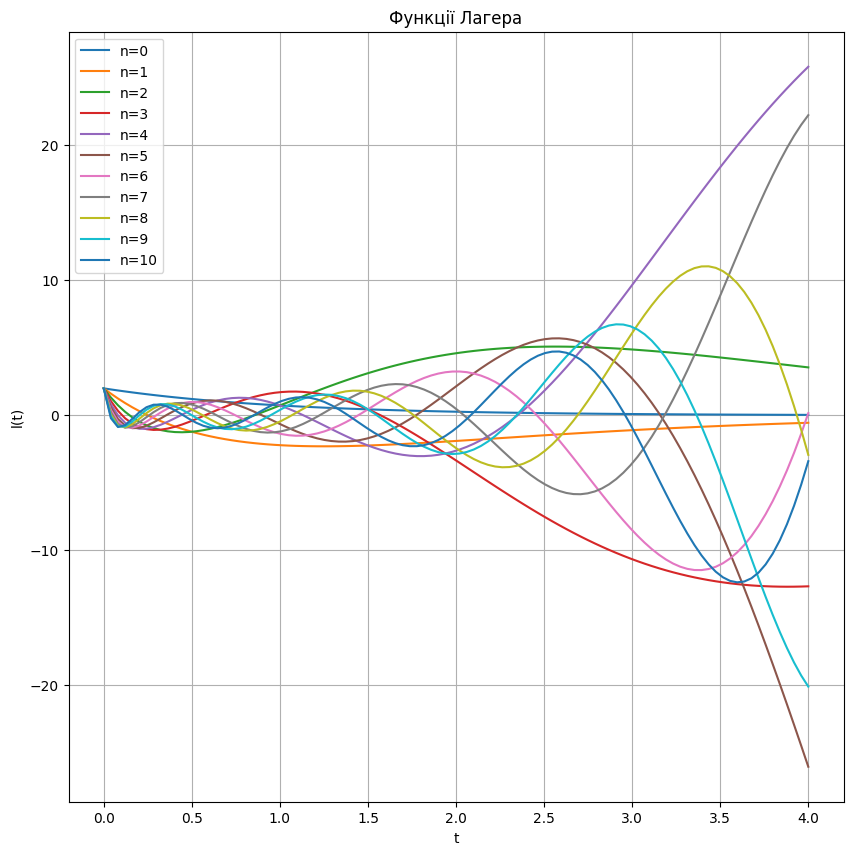

In [45]:
#task 7

def make_plots(T, N, beta=2, sigma=4):
    fig, ax = plt.subplots(figsize=(10, 10))

    for n in range(N + 1):
        t_values, laguerre_values = tabulate_laguerre(n, beta, sigma,T)
        ax.plot(t_values, laguerre_values, label=f"n={n}")

    ax.set_xlabel("t")
    ax.set_ylabel("l(t)")
    ax.set_title("Функцiї Лагера")
    plt.grid()
    ax.legend()
    plt.show()

make_plots(4, 10)

In [46]:
def tabulate_inverse(func,transformed_values,t1=0,t2=2*np.pi,beta=2,sigma=4):
    T = np.linspace(t1,t2,1000)
    result =[]
    correct_values = []
    for t in T:
        result.append(inverse_laguerre(transformed_values,t,beta,sigma))
        correct_values.append(func(t))
    return result,correct_values

3.959484238721473e-05
0.007308468850960116
0.0
0.05525940404914359
0.0
0.03380775225711959
0.0
0.00482844765371077
5.12996732042392e-08
0.00024152154456183553
5.4075651343506e-06
0.00025968727654179753
0.0
0.03162180343904547
0.0
0.05376441793127224
0.0
0.01487365734254353
2.0452584714145525e-09
0.0012083590469189782
6.080585158849947e-07
0.008816951654933071
0.002121740789405523
4.670988284780038e-05
0.030330803623564728
9.173412959894105e-05
0.05785905854583635
0.00027558594966252186
0.041540565159655915
0.00107472098640177
0.01630478992106847
0.0044856030263165265
6.655174521718368e-05
4.070284965810196e-05
0.011827978001367026
6.143627587404638e-05
0.04904160597100773
0.0001523067001875999
0.053849184424307465
0.000532717610632881
0.027596410225382447
0.0022051659356937077
1.194265608554565e-08
3.351740397988215e-05
0.0
1.647003849335917e-05
0.0
4.600284402529959e-06
0.0
7.26264581580199e-07
0.0
5.993606447449762e-08
1.3544817906207002e-09
3.851552804821012e-05
0.0
2.52675884261015

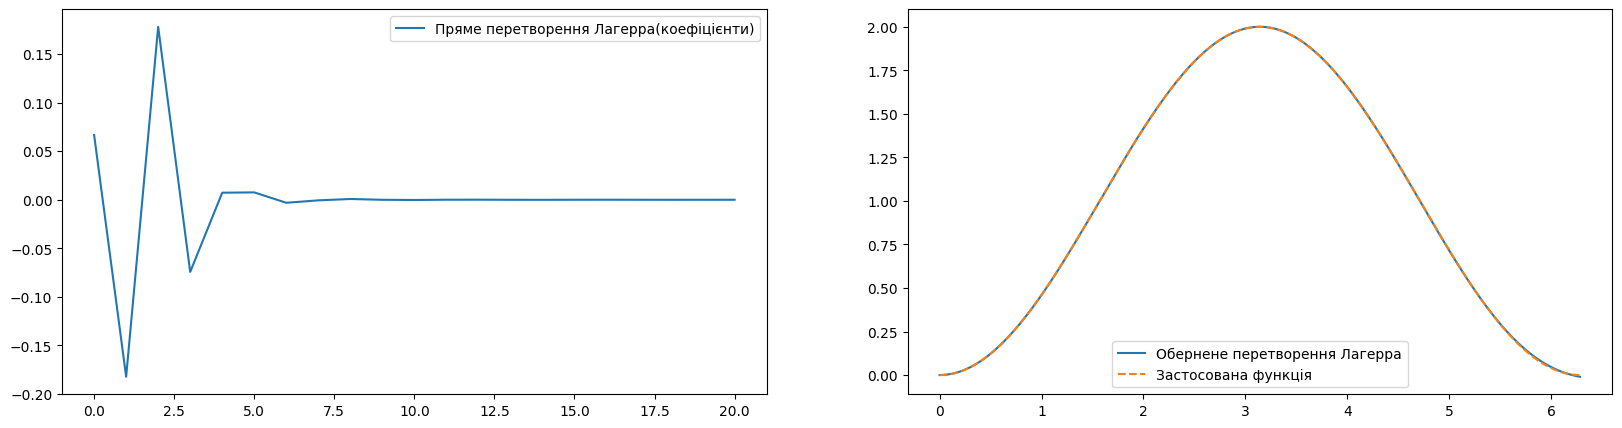

In [47]:
transformed = tabulate_transformation(f,20,2,4)
reversed_transform_values, correct = tabulate_inverse(f,transformed)

fig = plt.figure(figsize=(20,5))
ax = fig.subplots(1,2)
ax[0].plot(transformed, label="Пряме перетворення Лагерра(коефіцієнти)")
ax[0].legend()
ax[1].plot(np.linspace(0,2*np.pi,1000),reversed_transform_values, label='Обернене перетворення Лагерра')
ax[1].plot(np.linspace(0,2*np.pi,1000),correct, label='Застосована функція', linestyle="--")
ax[1].legend()

В попередній комірці ми отримали два графіки: на першому відображені
коефіцієнти прямого перетворення Лаґерра, а на другому обернене
перетворення, а також значення нашої функції. 
Як бачимо, ці графіки
співпадають, що дає нам змогу удостовіритись у правильності побудови
обернено перетворення Лаґерра.

-1.745793291920285e-05
1.4776456009026089
1.1180186305410393e-10
0.3735810819860736
7.869485166017227e-10
0.017740234155556953
9.454219460312222e-09
-0.001716825464812596
1.0618820001615294e-07
-0.00012048256270318237
-1.3589292877006676e-06
1.9030404258616098
6.691016973519316e-11
0.8697347042854463
2.6637653451140094e-10
0.11021212120292614
2.6358662420382836e-09
-0.001256313857573865
3.3941405251641656e-08
-0.00057141335241475
1.6130497149422763e-07
-0.002163094207104498
1.7212204015338006
-2.1019210143459146e-05
0.895779865827141
-4.39279435820113e-05
0.2632265574903746
-0.00013769805707305522
0.03734697744243272
-0.0005134939855894567
-0.000745935087974029
-0.0016400324871627594
1.9509845050639847
-1.80105583510614e-05
1.3308235089635059
-2.84613606664471e-05
0.5236302706463069
-7.4995729029836e-05
0.11118016741935496
-0.0002644391593064421
0.008095204882489264
-0.0009647115936244623
6.170526388227322e-08
-1.4442669486372903e-05
8.294600567178854e-11
-6.219424469864094e-06
2.55080

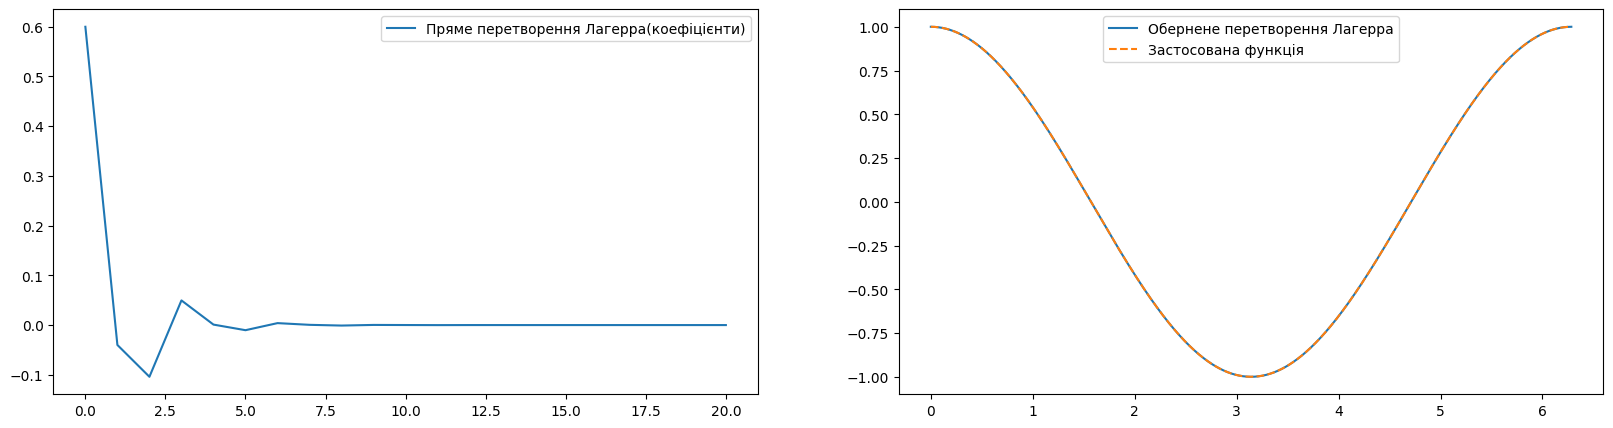

In [48]:
def example(x):
    return np.cos(x)

result = tabulate_transformation(example, 20,2,4)

reversed_transform, correct_values = tabulate_inverse(example,result)

fig = plt.figure(figsize=(20,5))
ax = fig.subplots(1,2)
ax[0].plot(result, label="Пряме перетворення Лагерра(коефіцієнти)")
ax[0].legend()
ax[1].plot(np.linspace(0,2*np.pi,1000),reversed_transform, label='Обернене перетворення Лагерра')
ax[1].plot(np.linspace(0,2*np.pi,1000),reversed_transform, label='Застосована функція', linestyle="--")
ax[1].legend()

У результаті лабораторної роботи ми вивчили що таке поліноми Лаґерра, написали функції для їх знаходження та функції для прямого та обернего перетворення та як застосовувати до них табуляцію.
    Навчились будувати таблиці за допомогою pandas та створювати графіки за допомогою matplotlib.
Навчилися працювати у форматі ноутбуків, та як переводити 
їх у формат PDF за допомогою latex.